# 1) Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas.
<br>Fonte dos dados das classes de Pasquill: *NOAA (National Oceanic and Atmospheric Administration)* <br>disponível em: https://www.ready.noaa.gov/READYpgclass.php <br>Para o nível de radiação, adotar os valores de fluxo de calor sensível: <br>Forte: > 800 W/m²
<br>Moderada: Entre 500 e 800 W/m²
<br>Fraca: < 500 W/m²
<br>Obs: Noite refere-se ao período de 1 hora antes do pôr do sol até 1 hora após o nascer do sol, ou seja, entre 19hs / 07hs

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def classify_pasquill_stability(wind_speed, hour, solar_radiation=None, cloud_cover=None):
    if 7 <= hour < 19:    # Dia (7h - 19h)
        if solar_radiation > 800:
            if wind_speed < 2:
                return 'A'
            elif wind_speed < 3:
                return 'B'
            elif wind_speed < 5:
                return 'B'
            elif wind_speed < 6:
                return 'C'
            else:
                return 'C'
        elif 500 < solar_radiation < 800:
            if wind_speed < 2:
                return 'A'
            elif wind_speed < 3:
                return 'B'
            elif wind_speed < 5:
                return 'C'
            elif wind_speed < 6:
                return 'C'
            else:
                return 'D'
        elif solar_radiation < 500:
            if wind_speed < 2:
                return 'B'
            elif wind_speed < 3:
                return 'C'
            elif wind_speed < 5:
                return 'C'
            elif wind_speed < 6:
                return 'D'
            else:
                return 'D'
    else:
        # Noite (19h - 7h)
        if cloud_cover > 50:
            if wind_speed < 2:
                return 'E'
            elif wind_speed < 3:
                return 'E'
            elif wind_speed < 5:
                return 'D'
            else:
                return 'D'
        elif cloud_cover :
            if wind_speed < 2:
                return 'F'
            elif wind_speed < 3:
                return 'F'
            elif wind_speed < 5:
                return 'E'
            else:
                return 'D'

#  2) Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade

In [1]:
# Criando função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe in ['A', 'B']:
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** (0.5)
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe == ['E', 'F']:
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5) 
            sigmaZ = 0.08 * x * (1 + 0.0015 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5) 
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0002 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0015 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5) 
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de área errada')

    return sigmaY, sigmaZ

# 3) Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs (quem fizer o método de Briggs ganha um ponto a mais). Deve ser considerado o efeito Tip-Downwash

In [10]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH_Davidson_Bryant = (d * (vs / u) ** 1.4) * (1 + (Ts - Tamb) / Ts)
    return deltaH_Davidson_Bryant

# Função para estimar o deltaH com base na equação de Holland
def holland_tipdownwash(d, vs, u, Ts, Tamb):
    deltaH_Holland = ((vs * d) / u) * (1.5 + 2.68 * 10 ** -10 * 1013.25 * ((Ts - Tamb) / Ts) * d)
    return deltaH_Holland

# 4) Implementar a função do modelo gaussiano

In [11]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [13]:
# Utilizando a função do modelo gaussiano
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 10 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
H = 50 # m

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H)

print("A concentração estimada é = " +str(conc) + ' µg/m³')

A concentração estimada é = 86.2052564132534 µg/m³


deltaH = 0.2921122707660167
A pluma subiu


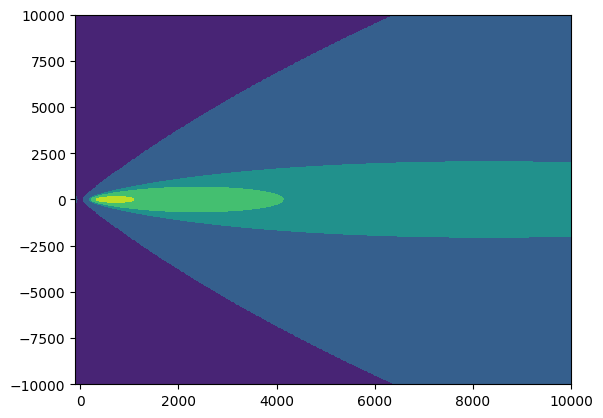

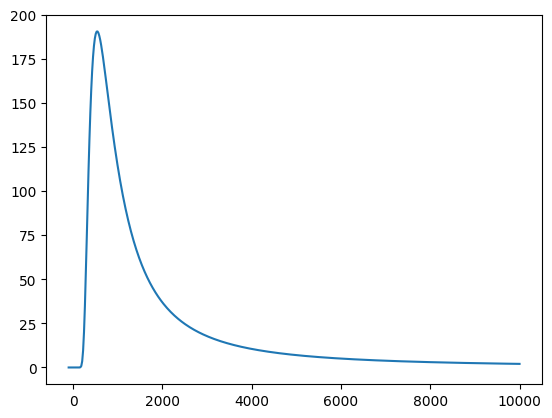

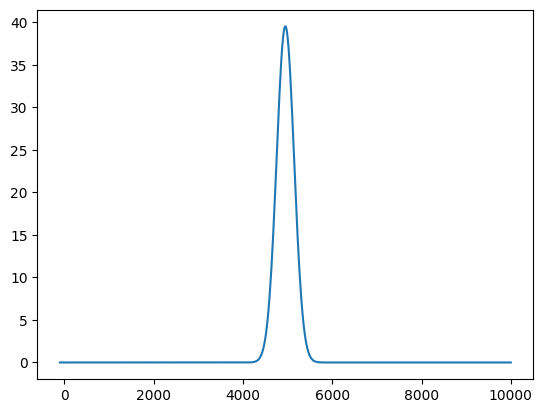

In [19]:
# Criando domínio de modelagem 
x = np.linspace(-100,10000,500)
#print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)


# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHdavidsonBryant(d,vs,u,Ts,Tamb)
    print('deltaH = '+str(deltaH))
    hef = hg+deltaH
    print('A pluma subiu')
else:
    hef = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,hef)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 100 m
Poluente: MP2.5, Concentração Máxima: 90.86609934938866 µg/m³, Padrão: 25 µg/m³
Altura da Chaminé Ajustada: 200 m
Violação: Sim

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 100 m
Poluente: SO2, Concentração Máxima: 864.2676017064849 µg/m³, Padrão: 125 µg/m³
Altura da Chaminé Ajustada: 280 m
Violação: Sim

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 100 m
Poluente: NOx, Concentração Máxima: 810.2053915672609 µg/m³, Padrão: 200 µg/m³
Altura da Chaminé Ajustada: 210 m
Violação: Sim

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 100 m
Poluente: CO, Concentração Máxima: 303.4761373007614 µg/m³, Padrão: 10000 µg/m³
Altura da Chaminé Ajustada: 100 m
Violação: Não

Classe: A, Velocidade do Vento: 2 m/s, Altura da Chaminé Inicial: 150 m
Poluente: MP2.5, Concentração Máxima: 41.56551650236462 µg/m³, Padrão: 25 µg/m³
Altura da Chaminé Ajustada: 200 m
Violação: Si

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

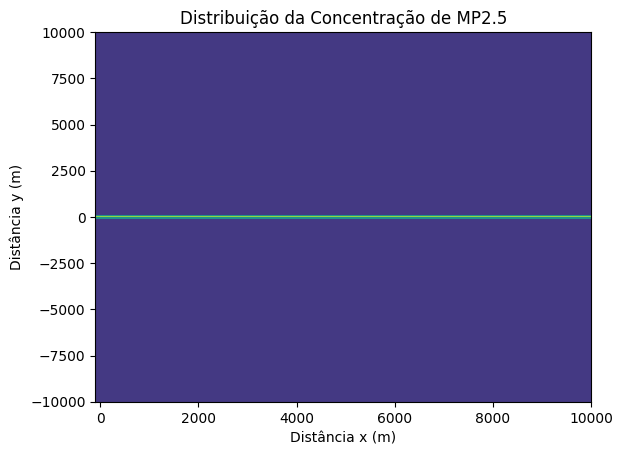

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Funções definidas anteriormente
def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y**2) / (2 * sigmaY**2))
    termo3 = np.exp((-(z - H)**2) / (2 * sigmaZ**2)) + np.exp((-(z + H)**2) / (2 * sigmaZ**2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10**6
    return conc

def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.2 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x)**(-0.5)
            sigmaZ = 0.12 * x
        # Adicionar mais classes conforme necessário
        else:
            raise ValueError("Classe de estabilidade não suportada para área urbana.")
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.32 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.24 * x
        elif classe == 'B':
            sigmaY = 0.22 * x * (1 + 0.0004 * x)**(-0.5)
            sigmaZ = 0.2 * x
        # Adicionar mais classes conforme necessário
        else:
            raise ValueError("Classe de estabilidade não suportada para área rural.")
    else:
        raise ValueError("Tipo de área não suportado. Deve ser 'urbano' ou 'rural'.")
    
    return sigmaY, sigmaZ

def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    F = vs * d / u  # Número de Froude
    deltaH = 1.5 * d * (F**(1/3)) * ((Ts / Tamb) - 1)**(1/2)
    return deltaH

# Parâmetros de entrada
taxas_emissao = {
    "MP2.5": 8.74, # g/s
    "SO2": 83.13, # g/s
    "NOx": 77.93, # g/s
    "CO": 29.19  # g/s
}

# Padrões da Resolução CONAMA 491
padroes_conama = {
    "MP2.5": 25, # µg/m³
    "SO2": 125, # µg/m³
    "NOx": 200, # µg/m³
    "CO": 10000  # µg/m³ (convertendo de 10 mg/m³)
}

# Condições de entrada para as simulações
classes_estabilidade = ['A', 'B']
velocidades_vento = [2, 5, 10]  # m/s
alturas_chamine_iniciais = [100, 150, 200]  # m

# Criação do domínio de modelagem
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)
xx, yy = np.meshgrid(x, y)

# Função para rodar as simulações
def rodar_simulacoes(taxas_emissao, padroes_conama, classes_estabilidade, velocidades_vento, alturas_chamine_iniciais):
    resultados = []
    for classe in classes_estabilidade:
        for u in velocidades_vento:
            for hg in alturas_chamine_iniciais:
                sigmaY, sigmaZ = sigmaXY(xx, classe, 'urbano')
                d = 1  # m
                vs = 10  # m/s
                Ts = 300  # K
                Tamb = 293  # K
                if vs > 1.5 * u:
                    deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
                    hef = hg + deltaH
                else:
                    hef = hg + 2 * d * ((vs / u) - 1.5)
                
                for poluente, qs in taxas_emissao.items():
                    conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, 1.5, hef)
                    max_conc = np.max(conc)
                    padrao = padroes_conama[poluente]
                    if max_conc > padrao:
                        # Ajustar a altura da chaminé
                        hg_ajustada = ajustar_altura_chamine(qs, padrao, sigmaY, sigmaZ, u, yy, vs, d, Ts, Tamb, hg)
                        resultados.append({
                            "Classe": classe,
                            "Velocidade_Vento": u,
                            "Altura_Chamine_Inicial": hg,
                            "Altura_Chamine_Ajustada": hg_ajustada,
                            "Poluente": poluente,
                            "Max_Concentracao": max_conc,
                            "Padrao": padrao,
                            "Violacao": True
                        })
                    else:
                        resultados.append({
                            "Classe": classe,
                            "Velocidade_Vento": u,
                            "Altura_Chamine_Inicial": hg,
                            "Altura_Chamine_Ajustada": hg,
                            "Poluente": poluente,
                            "Max_Concentracao": max_conc,
                            "Padrao": padrao,
                            "Violacao": False
                        })
    
    return resultados

def ajustar_altura_chamine(qs, padrao, sigmaY, sigmaZ, u, yy, vs, d, Ts, Tamb, hg_inicial):
    altura = hg_inicial
    violacao = True
    while violacao:
        if vs > 1.5 * u:
            deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
            hef = altura + deltaH
        else:
            hef = altura + 2 * d * ((vs / u) - 1.5)
        
        conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, 1.5, hef)
        max_conc = np.max(conc)
        if max_conc <= padrao:
            violacao = False
        else:
            altura += 10  # Aumenta a altura da chaminé em 10 m a cada iteração
    return altura

# Rodando as simulações
resultados = rodar_simulacoes(taxas_emissao, padroes_conama, classes_estabilidade, velocidades_vento, alturas_chamine_iniciais)

# Imprimindo os resultados
for resultado in resultados:
    print(f"Classe: {resultado['Classe']}, Velocidade do Vento: {resultado['Velocidade_Vento']} m/s, Altura da Chaminé Inicial: {resultado['Altura_Chamine_Inicial']} m")
    print(f"Poluente: {resultado['Poluente']}, Concentração Máxima: {resultado['Max_Concentracao']} µg/m³, Padrão: {resultado['Padrao']} µg/m³")
    print(f"Altura da Chaminé Ajustada: {resultado['Altura_Chamine_Ajustada']} m")
    print(f"Violação: {'Sim' if resultado['Violacao'] else 'Não'}\n")

# Visualização de um caso específico
conc = modeloGaussiano(taxas_emissao['MP2.5'], sigmaY, sigmaZ, 5, yy, 1.5, hef)
fig, ax = plt.subplots()
ax.contourf(xx, yy, conc + 0.1, norm=LogNorm())
plt.title('Distribuição da Concentração de MP2.5')
plt.xlabel('Distância x (m)')
plt.ylabel('Distância y (m)')
plt.colorbar(label='Concentração (µg/m³)')
plt.show()
